# Assignment 3

Use the Colab notebook to complete the assignment. Before you begin, save a personal copy (File > Save a copy in drive) of the notebook and work on that, as it may not save your progress otherwise.

Once you are done, re-run all the cells to make sure they work and their outputs are shown. Then download the notebook by going to File > Download .ipynb. Furthermore, save a .pdf of your notebook by going to File > Print, make sure that it is set to "Print to file", and then save the .pdf to your computer. Upload both the .ipynb and the .pdf file to the assignment dropbox on Moodle.

The assignment is due on Friday December 9, at 5pm. It is worth 15% of your course grade.

# 1. Signal Processing (20 points)

### Exercise 1.1 (5 points)

Using librosa's `librosa.tone` function, create three sine waves (100Hz, 300Hz, 500Hz) with a sampling rate of 16000Hz, a duration of 1 second, and a phase of 180 degrees.

In [ ]:
import librosa
import numpy as np
import librosa.display

In [ ]:
tone1 = librosa.tone(100, sr=16000, length=16000)
tone2 = librosa.tone(300, sr=16000, length=16000)
tone3 = librosa.tone(500, sr=16000, length=16000)

In [ ]:
def plot_wave(tone):
  fig, ax = plt.subplots()
  S = librosa.feature.melspectrogram(y=tone)
  librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel', ax=ax)



In [ ]:
import matplotlib.pyplot as plt

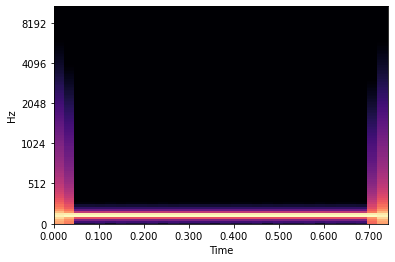

In [ ]:
plot_wave(tone1)

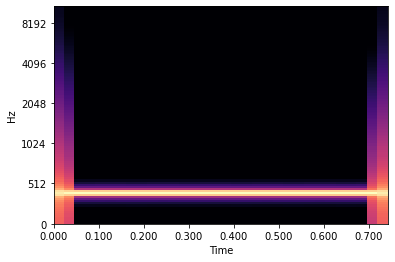

In [ ]:
plot_wave(tone2)

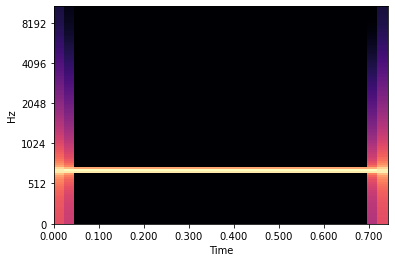

In [ ]:
plot_wave(tone3)

### Exercise 1.2 (5 points)

Combine the three waves into one compound wave.

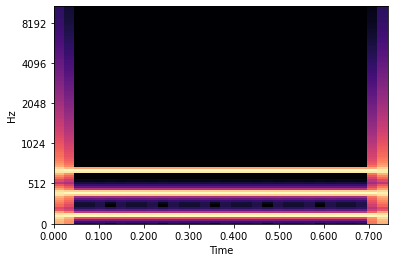

In [ ]:
plot_wave(tone1+tone2+tone3)

### Exercise 1.3 (5 points)

Export the compound sine wave to a .wav file, import it into Audacity, plot the spectrum, and include a screenshot of it in your notebook (Insert a Text cell and then there will be a button to upload an image). Show that the underlying frequencies of the three sine waves are still present.

In [ ]:
import soundfile as sf

In [ ]:
sf.write('tones.wav', (tone1+tone2+tone3), 16000, subtype='PCM_24')

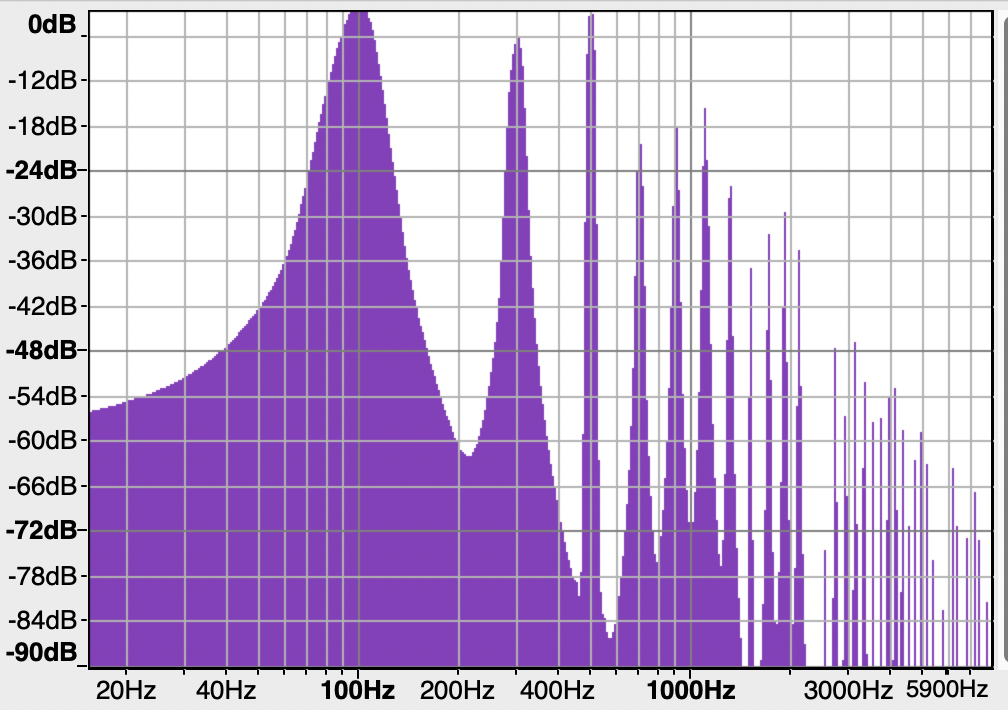

### Exercise 1.4 (5 points)

What would be the minimum sampling frequency required to accurately capture the compound wave?

The Nyquist theorem states that to accurately reproduce a pure sine wave measurement, or sample, rate, you must sample at at least twice its frequency.  In the image above, if we ignore the underlying frequences, the greatest wave has a frequencey of 500 so we should use a value a bit greater that this.  I would use 600 and double it to get a minimum minimum sampling frequency of 1200 Hertz required to accurately capture the compound wave.

# 2. Phonetics (25 points)

For this exercise, you will be working with an audio sample for the vowel [e]. Download the sample into Colab as following:

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/6c/Close-mid_front_unrounded_vowel.ogg

--2022-12-12 00:35:31--  https://upload.wikimedia.org/wikipedia/commons/6/6c/Close-mid_front_unrounded_vowel.ogg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18193 (18K) [application/ogg]
Saving to: ‘Close-mid_front_unrounded_vowel.ogg’

Close-mid_front_unr 100%[===================>]  17.77K  --.-KB/s    in 0s      

2022-12-12 00:35:31 (61.1 MB/s) - ‘Close-mid_front_unrounded_vowel.ogg’ saved [18193/18193]



### Exercise 2.1 (4 points)

Use ffmpeg to determine what the sampling rate is. Then use ffmpeg to convert the file to a .wav file with a 22050Hz sampling rate.

In [ ]:
!ffmpeg -i 'Close-mid_front_unrounded_vowel.ogg' -ar 22050 'Close-mid_front_unrounded_vowel.wav' -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

### Exercise 2.2 (4 points)

Import the .wav file into Librosa and print out the the amplitudes of the samples from 0.3 to 0.4 seconds (it is okay if the output shows only the couple of first and last values).

In [ ]:
import librosa
import numpy as np

In [ ]:
audio_file = "Close-mid_front_unrounded_vowel.wav"
y, sr = librosa.load(audio_file, sr = None, mono = True)
start_end_samples = librosa.time_to_samples(np.array([0.3, 0.4]), sr)
print(y[start_end_samples[0]:start_end_samples[1]])

[0.10256958 0.23843384 0.16537476 ... 0.03707886 0.05532837 0.05606079]


### Exercise 2.3 (5 points)

Plot the spectrogram (**using the full file again**). Make the y-axis linear, and set its limit to 5000Hz.

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

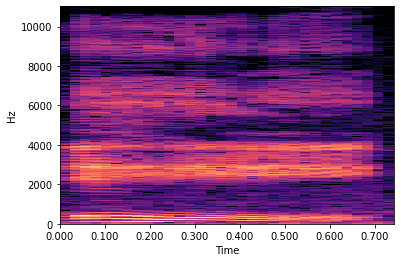

In [ ]:
D = np.abs(librosa.stft(y))
DdB = librosa.amplitude_to_db(D, ref=np.max)
img = librosa.display.specshow(DdB, y_axis='linear', x_axis='time', sr=sr)

### Exercise 2.4 (5 points)

Use parselmouth to extract the first 4 formants and display them in a pandas dataframe.

In [ ]:
!pip install praat-parselmouth
import parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
audio = parselmouth.Sound("Close-mid_front_unrounded_vowel.wav")
formants = audio.to_formant_burg()

formants_ts = {}
timestep = formants.get_time_step()
for formant_idx in range(1,5):
    formants_ts[formant_idx] = np.array([formants.get_value_at_time(formant_idx, i * timestep) 
                              for i in range(0, formants.get_number_of_frames())])

df = pd.DataFrame({'F1': formants_ts[1], 'F2': formants_ts[2], 'F3': formants_ts[3], 'F4': formants_ts[4]})
df

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,421.674966,2377.802786,2997.674160,3878.469161
...,...,...,...,...
103,347.092861,2527.295259,2880.618623,3844.720256
104,367.656997,2560.626546,2831.025508,3865.558753
105,385.360187,2601.385710,2842.178175,3886.114091
106,386.485227,2583.537117,2868.690810,3883.041330


### Exercise 2.5 (7 points)

Plot the formants on top of the spectrogram. To do this, you will have to figure out how long the timesteps of the formants are, so that you can align them with the x-axis of the spectrogram. Your result should look roughly like this.

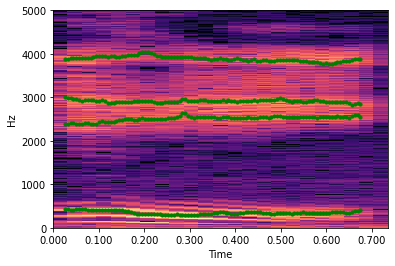

In [ ]:
timestep_list = []
for i in range(108):
  timestep_list.append(timestep * i)

In [ ]:
df["timestep"] = timestep_list

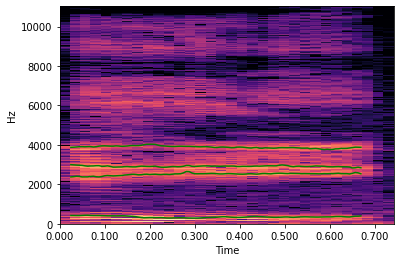

In [ ]:
plt.plot(df["timestep"],df["F1"],'g-')
plt.plot(df["timestep"],df["F2"],'g-')
plt.plot(df["timestep"],df["F3"],'g-')
plt.plot(df["timestep"],df["F4"],'g-')
img = librosa.display.specshow(DdB, y_axis='linear', x_axis='time', sr=sr)
plt.show()

#3. Sound event detection (30 points)

Frame-level audio classification.

### Exercise 3.1 (2 points)

Load the audio file into Librosa, extract MFCCs (40 features) and MFCC deltas, and combine them into a feature array. The array should have the dimensions `(9299, 80)`.

In [ ]:
!gdown https://drive.google.com/uc?id=1WV__mI9c9a-SHaz-6JE3xfwwfcs6ACdi
!unzip Sound_Event_Detection.zip

Downloading...
From: https://drive.google.com/uc?id=1WV__mI9c9a-SHaz-6JE3xfwwfcs6ACdi
To: /content/Sound_Event_Detection.zip
100% 4.63M/4.63M [00:00<00:00, 154MB/s]
Archive:  Sound_Event_Detection.zip
   creating: Sound_Event_Detection/
  inflating: Sound_Event_Detection/prepared_labels.pkl  
  inflating: Sound_Event_Detection/TUT_audio.wav  
  inflating: Sound_Event_Detection/TUT_labels.ann  


In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import librosa
import pandas as pd
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
audio_file = '/content/Sound_Event_Detection/TUT_audio.wav'
y, sr = librosa.load(audio_file)
mfcc = librosa.feature.mfcc(y, n_mfcc=40)
delta = librosa.feature.delta(mfcc)
features = np.vstack([mfcc,delta])
features = np.moveaxis(features, 1, 0)
print(features.shape)

(9299, 80)


### Exercise 3.2 (1 point)

Load the file `prepared_labels.pkl` which contains one label for each of the 9299 MFCC frames.

Load it like this: `labels = pickle.load(open("prepared_labels.pkl", "rb"))`)

In [ ]:
df = pd.read_csv('/content/Sound_Event_Detection/TUT_labels.ann', sep='\t', header = None)

In [ ]:
df.columns = ["start","stop","label"]

In [ ]:
labels = []
for i in range(features.shape[0]):
  labels.append(0)
labels = np.array(labels).astype(str)

In [ ]:
mfcc_span = 512/float(sr)
time_points = librosa.frames_to_time(np.arange(0, mfcc.shape[1]))
time_points = time_points + mfcc_span/2
time_points_array = np.array(time_points, dtype=float)

startpoints = np.array(df['start'], dtype=float)
stoppoints = np.array(df['stop'], dtype=float)
idx_start = librosa.util.match_events(startpoints, time_points_array)
idx_stop = librosa.util.match_events(stoppoints, time_points_array)

In [ ]:
i = 0
for a, b in zip(idx_start, idx_stop):
    labels[list(range(a, b))] = df["label"][i]
    i += 1
labels[labels=="0"]="other"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


### Exercise 3.3 (2 points)

Perform a train/test split with `test_size = 0.3`, `shuffle = True`, and `random_state = 0`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.3,random_state = 0)

### Exercise 3.4 (4 points)

Train a Random Forest classifier with `random_state = 0` and assess its performance using `sklearn.metrics.classification_report`.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
predicted_rf = rf_clf.predict(X_train)


In [ ]:
from sklearn.metrics import classification_report

In [85]:
print(metrics.classification_report(y_test, predicted_rf))

ValueError: ignored

### Exercise 3.5 (7 points)

In your own words, explain how accuracy is calculated for a multi-class problem like this (as opposed to the binary class problem we worked on in class). Why is the accuracy lower than in the binary classification example we worked on in class?

For multiclass problems, accuracy is calculated for each class.  Then the average of these give our score.  The accuracy is lower compared to that of a binary problem since there are more accuracy scores calulated because of the numerous classes.  Also, there are also more wrong possibilites for the classification, making it difficult to get a high accuracy.

### Exercise 3.6 (7 points)

Repeat the dataset split and classification process with 5-fold cross-validation.

- Keep everything the same until before the `train_test_split`.
- Instead of `train_test_split`, use the `sklearn.model_selection.KFold` function with `n_splits=5`, `shuffle=True`, and `random_state=0`.
- Loop over the object created by this function to get the indices to subset your feature and label arrays with for the current fold. You can follow the example in the [KFold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
- Apply the classifier in each iteration of this loop and save the accuracy value (calculated with
`sklearn.metrics.accuracy_score`).
- Take the mean of the accuracy from each fold and print it out.
- In your own words, explain why we this accuracy measure is more reliable than the one from 3.4.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [94]:
accuracy_list = []
for train, test in kf.split(features, labels):
  X_train, X_test, y_train, y_test = features[train], features[test], labels[train], labels[test]
  clf = RandomForestClassifier(random_state = 0)
  clf.fit(X_train, y_train)
  test_pred = clf.predict(X_test)
  a = accuracy_score(y_test, test_pred)
  accuracy_list.append(a)

In [95]:
accuracy_list

[0.7301075268817204,
 0.7505376344086021,
 0.7543010752688172,
 0.7623655913978494,
 0.7616998386229156]

In [96]:
accuracy_array = np.array(accuracy_list)
np.mean(accuracy_array)

0.7518023333159809

This accuracy measure is more reliable than the one from 3.4 because there is a lot of accuracy variance with train test splits, due to the multi-class nature of the problem.   However, using 5 random train test splits and then calculating the average accuracy for the models decreases the effect of outliers in the class accuracy.

### Exercise 3.7 (7 points)

Build a classifier without using MFCCs that reaches at least 50% performance.

- You may use any features from [librosa.feature](https://librosa.org/doc/latest/feature.html) except mfcc, melspectrogram and their deltas (you may use the deltas of other features).
- You should still have the same number of frames as before (9299).
- Combine these features into an array, repeat the train/test split (using the same parameters) and the Random Forest. Print out the classification report.

In [ ]:
t_features.shape

(9299, 12)

In [ ]:
tonnetz = librosa.feature.tonnetz(y,sr)
t_delta = librosa.feature.delta(tonnetz)
t_features = np.vstack([tonnetz,t_delta])
t_features = np.moveaxis(t_features, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t_features,labels,test_size = 0.3, shuffle = True,random_state = 0)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
predicted_rf = rf_clf.predict(X_train)


In [87]:
print(metrics.classification_report(y_test, predicted_rf))

ValueError: ignored

#4. Speaker detection (25 points)

For this exercise, you will do speaker detection on audio excerpts from speeches by 4 U.S. senators - Sens. Brown, Casey, Cornyn, and Manchin. The data are contained in a zip archive called `Senators.zip`. It contains 5 folders. There is one folder for each senator, containing two files each. There is one additional folder called Unknown, which contains three files, file1.flac, file2.flac, and file3.flac.

Your task is to use Resemblyzer to determine which senators file1.flac, file2.flac, and file3.flac belong to - and which of the four senators is missing in the Unknown folder.

Remember that if you are unsure your answer is correct, you could just listen to the files. But only a programmatic answer will be accepted ;-)

Be mindful of the order in which the files are represented, and which types of embeddings go into which dimension of the results array.

In [ ]:
!gdown https://drive.google.com/uc?id=1R1LoXlPsxEy2_3hYjkEX-KXDtAplPZ-N
!unzip Senators.zip

Downloading...
From: https://drive.google.com/uc?id=1R1LoXlPsxEy2_3hYjkEX-KXDtAplPZ-N
To: /content/Senators.zip
100% 21.3M/21.3M [00:00<00:00, 114MB/s] 
Archive:  Senators.zip
   creating: Senators/
   creating: Senators/Brown/
 extracting: Senators/Brown/brown1.flac  
 extracting: Senators/Brown/brown2.flac  
   creating: Senators/Casey/
 extracting: Senators/Casey/casey1.flac  
 extracting: Senators/Casey/casey2.flac  
   creating: Senators/Cornyn/
 extracting: Senators/Cornyn/cornyn1.flac  
 extracting: Senators/Cornyn/cornyn2.flac  
   creating: Senators/Manchin/
 extracting: Senators/Manchin/manchin1.flac  
 extracting: Senators/Manchin/manchin2.flac  
   creating: Senators/Unknown/
 extracting: Senators/Unknown/file1.flac  
 extracting: Senators/Unknown/file2.flac  
 extracting: Senators/Unknown/file3.flac  


### Exercise 4.1 (10 points)
Preprocess all files and create speaker embeddings from the labelled files in the Brown, Casey, Cornyn and Manchin folders.

In [ ]:
!git clone https://github.com/resemble-ai/Resemblyzer.git
!pip install -r Resemblyzer/requirements_package.txt
!pip install -r Resemblyzer/requirements_demos.txt

Cloning into 'Resemblyzer'...
remote: Enumerating objects: 608, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 608 (delta 1), reused 6 (delta 1), pack-reused 602
Receiving objects: 100% (608/608), 101.47 MiB | 31.85 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 7.6 MB/s 
     |████████████████████████████████| 66 kB 5.4 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp38-cp38-linux_x86_64.whl size=71471 sha256=988018ad22c4d349815c91a3e8874854991b902f3c3871e0f8b23fde9bc47aab
  Stored in directory: /root/.cache/pip/wheels/75/e1/fc/01099a9fd0882ce84cc99eb51495812bb8a703461c2b0ca1cb
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26323 sha256=bb141ff936838ab5166603cd33164ed4d8ddcc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 20.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=698e3968dab7ce5541d84fa28b1aaa38884e0361dd436814cb61e369b11b24d7
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=846ffb33e38cc9bf2afacba3a14972e7d36acbcc397fa3442dbd0c73b8f32395
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import sys
sys.path.append("Resemblyzer")

from resemblyzer import preprocess_wav, VoiceEncoder, normalize_volume
from demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import librosa
import pandas as pd
import seaborn as sns

In [ ]:
!mkdir /content/Senators/Labeled_Files

In [ ]:
!mv /content/Senators/Brown \
    /content/Senators/Casey \
    /content/Senators/Cornyn \
    /content/Senators/Manchin \
    /content/Senators/Labeled_Files

In [ ]:
wav_fpaths = list(Path("Senators", "Labeled_Files").glob("**/*.flac"))
wav_fpaths.sort()

In [ ]:
wav_fpaths

[PosixPath('Senators/Labeled_Files/Brown/brown1.flac'),
 PosixPath('Senators/Labeled_Files/Brown/brown2.flac'),
 PosixPath('Senators/Labeled_Files/Casey/casey1.flac'),
 PosixPath('Senators/Labeled_Files/Casey/casey2.flac'),
 PosixPath('Senators/Labeled_Files/Cornyn/cornyn1.flac'),
 PosixPath('Senators/Labeled_Files/Cornyn/cornyn2.flac'),
 PosixPath('Senators/Labeled_Files/Manchin/manchin1.flac'),
 PosixPath('Senators/Labeled_Files/Manchin/manchin2.flac')]

In [ ]:
encoder = VoiceEncoder()

Loaded the voice encoder model on cpu in 0.06 seconds.


In [ ]:
speaker_wavs = {speaker: list(map(preprocess_wav, wav_fpaths)) for speaker, wav_fpaths in
                groupby(tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit="wavs"), 
                lambda wav_fpath: wav_fpath.parent.stem)}

Preprocessing wavs: 100%|██████████| 8/8 [00:23<00:00,  3.00s/wavs]


In [ ]:
spk_embeds = np.array([encoder.embed_speaker(wavs) \
                         for wavs in speaker_wavs.values()])

In [ ]:
spk_embeds.shape

(4, 256)

### Exercise 4.2 (5 points)
Create utterance embeddings for unlabelled files in the Unknown folder.

In [ ]:
wav_fpaths = list(Path("Senators", "Unknown").glob("**/*.flac"))
wav_fpaths.sort()

In [ ]:
encoder = VoiceEncoder()

Loaded the voice encoder model on cpu in 0.01 seconds.


In [ ]:
unknown_wavs = {speaker: list(map(preprocess_wav, wav_fpaths)) for speaker, wav_fpaths in
                groupby(tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit="wavs"), 
                        lambda wav_fpath: wav_fpath.stem)}

Preprocessing wavs: 100%|██████████| 3/3 [00:04<00:00,  1.61s/wavs]


In [ ]:
unknown_wavs

{'file1': [array([-0.00391922, -0.00239252, -0.00096042, ...,  0.00703048,
          0.00747991,  0.00608824], dtype=float32)],
 'file2': [array([-0.00127247, -0.00116269, -0.00130624, ...,  0.00011954,
          0.00059783,  0.00099921], dtype=float32)],
 'file3': [array([-0.00083633,  0.00153123,  0.00257233, ...,  0.0161618 ,
          0.01474289,  0.01933592], dtype=float32)]}

### Exercise 4.3 (10 points)
Determine out which file in the Unknown folder belongs to which senator, and which senator is missing from the Unkown folder. Print out the results.

In [ ]:
embeding_list = []
speaker_names = list(speaker_wavs.keys())
filenames = list(unknown_wavs.keys())
file_speakers = []

In [ ]:
for key in unknown_wavs:
  utterance_embed = np.array(encoder.embed_utterance(unknown_wavs[key][0]))
  embeding_list.append(utterance_embed)

In [ ]:
for embeding in embeding_list:
  utt_sim_array = np.inner(spk_embeds, embeding)
  speaker = speaker_names[np.argmax(utt_sim_array)]
  file_speakers.append(speaker)

In [ ]:
df = pd.DataFrame(list(zip(filenames, file_speakers)),columns =['Filename', 'Speaker'])

In [ ]:
df

,Filename,Speaker
0,file1,Cornyn
1,file2,Casey
2,file3,Manchin


Senator Brown is missing.